# Importing libraries

In [78]:
import numpy as np                  #for numerical calculation
import matplotlib.pyplot as plt     #for data visualization

# setting matplotlib plotting parameters
plt.rcdefaults()
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rc('font', family='serif')

# Generating sample data for $y = mx + c$ equation

In [79]:
sample_size = 100
x           = 2 * np.random.rand(sample_size, 1)            # generate sample data for x                        
y           = 4 + 3 * x + np.random.rand(sample_size, 1)    # generate sample data for y
x_b         = np.c_[np.ones((sample_size, 1)), x]           # adding bias X0 = 1
x_new       = np.array([[0], [2]])                          # making prediction at x_new value
x_new_b     = np.c_[np.ones((2,1)), x_new]                  # adding bias to x_new value


## Impelementing gradient descent for linear regression

In [104]:
def fit_and_plot(eta, sample_size, n_iteration, x_b, y):
    theta = np.random.rand(2,1)
    
    for i in range(n_iteration):
        gradient = 2/sample_size * (x_b.T).dot(x_b.dot(theta)- y)       #calculating batch theta gradient
        theta = theta - eta * gradient                                  #calculating latest theta
        y_predict = x_new_b.dot(theta)                                  #predict value
        plt.plot(x_new, y_predict, label=f"epoch:{i}")                  #plot predicted value
        plt.scatter(x, y)                                               #plot scatter plot of give input x, y
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(r"$\eta = $" + f"{eta}")
        plt.legend()
    print(f"Learning rate: {eta} | Final epoch theta: {theta[0], theta[1]}")

Learning rate: 0.01 | Final epoch theta: (array([1.54254885]), array([1.88075902]))
Learning rate: 0.1 | Final epoch theta: (array([3.7461589]), array([3.60792828]))
Learning rate: 0.5 | Final epoch theta: (array([-10.16130084]), array([-14.24902043]))


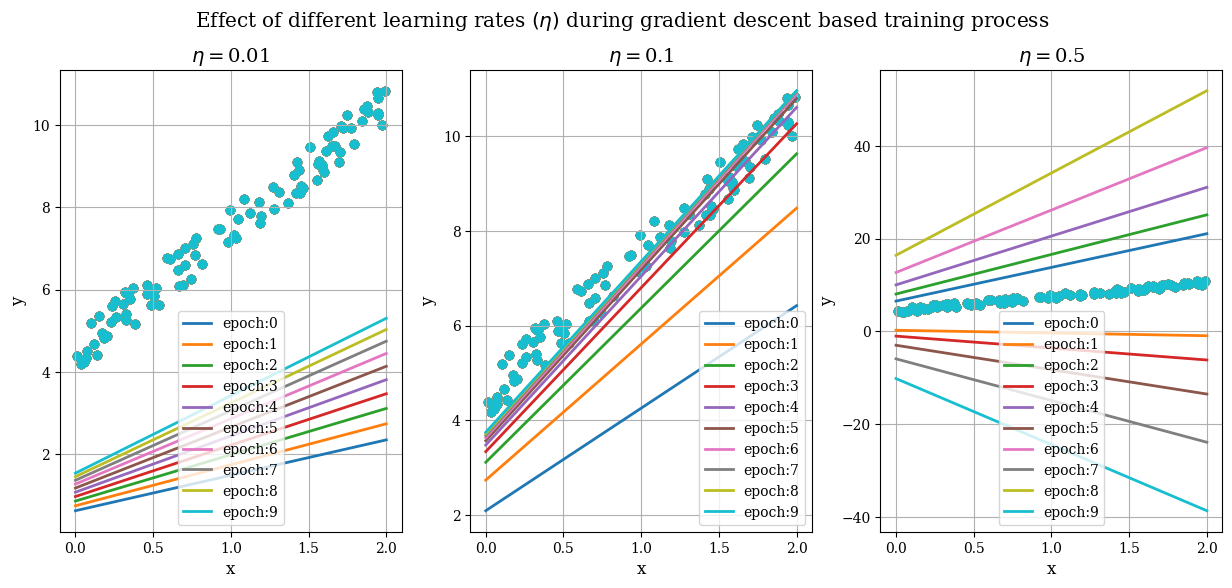

In [106]:
plt.figure(figsize=[15,6])
eta_list = [0.01, 0.1, 0.5]

for i in range(1, 4):
    plt.subplot(1, 3, i)
    fit_and_plot(eta_list[i-1], sample_size, 10, x_b, y)
    plt.grid()
    plt.suptitle(r"Effect of different learning rates $(\eta)$ during gradient descent based training process")

## Comparing gradient descent results with analytical solution

In [92]:
best_theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
best_theta

array([[4.48184711],
       [3.01104576]])

> Visualizing learning rate in gradient descent helped to understand the slow moving versus highly fluctuating movement of gradient during training